### Load the dataset

In [15]:
from load_dataset import load_dataset
df = load_dataset(file_path="/Users/nijiayi/Stats_C161-261_Project/train_data_2022_processed.csv") # Enter the file path here
label_counts = df["label"].value_counts()
print(label_counts)
print(df.shape)

4it [00:35,  8.98s/it]

label
0    3778299
1      59459
Name: count, dtype: int64
(3837758, 95)


### Split the dataset

In [16]:
import pandas as pd

# Separate the data based on the label
df_label_1 = df[df["label"] == 1]
df_label_0 = df[df["label"] == 0]

# Sample 20% of each label class for the test set
df_label_1_test = df_label_1.sample(frac=0.2, random_state=123)
df_label_0_test = df_label_0.sample(n=len(df_label_1_test), random_state=123)  # Match the size of label=1

# Combine the test data
test_data = pd.concat([df_label_1_test, df_label_0_test])

# The rest goes to the training set
df_label_1_train = df_label_1.drop(df_label_1_test.index)
df_label_0_train = df_label_0.drop(df_label_0_test.index)

# Combine the training data
train_data = pd.concat([df_label_1_train, df_label_0_train])

# Separate features and labels for train and test sets
X_train = train_data.drop(columns=["label"])
y_train = train_data["label"]

X_test = test_data.drop(columns=["label"])
y_test = test_data["label"]
# # Save the train and test datasets
# train_data.to_csv("train.csv", index=False)
# test_data.to_csv("test.csv", index=False)

In [17]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3813974, 94), (3813974,), (23784, 94), (23784,))

### Do Feature Selection on the Balanced Train Dataset

In [18]:
from load_dataset import balanced_dataset_downsampling
balanced_train_data_downsampling =  balanced_dataset_downsampling(train_data)

100%|██████████| 1/1 [00:03<00:00,  3.08s/it]


In [19]:
balanced_train_data_downsampling.shape

(95134, 95)

In [20]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

X_train = balanced_train_data_downsampling.drop(columns=["label"])
y_train = balanced_train_data_downsampling["label"]

lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)

# Make predictions and calculate performance
y_pred = lasso.predict(X_test)
print("Lasso Regression Mean Squared Error:", mean_squared_error(y_test, y_pred))

# Lasso coefficients (note that some may be zero)
print("Lasso Coefficients:", lasso.coef_)

Lasso Regression Mean Squared Error: 0.18963846913488236
Lasso Coefficients: [-1.23254319e-09  1.45101148e-08 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  2.46893911e-05 -0.00000000e+00  6.47715128e-04
  0.00000000e+00  8.79704451e-05  2.64038078e-05 -1.93812223e-05
  4.24160661e-03 -2.45159946e-07  8.07960614e-07 -2.75289744e-02
  1.43730406e-07 -0.00000000e+00 -5.02912844e-04  0.00000000e+00
 -8.69997086e-05 -0.00000000e+00  1.21307097e-03 -0.00000000e+00
 -8.59543908e-08 -1.03267441e-02 -7.57267808e-03  0.00000000e+00
  1.71712015e-04 -7.30322832e-09 -4.62059314e-09  1.82276541e-08
 -5.43350483e-08  1.44876109e-08 -4.94210320e-08  4.51507751e-08
 -2.96474525e-07  9.49050719e-09  3.54516828e-06 -3.99604807e-06
  5.90043348e-08  1.69495881e-07  8.12617915e-09 -3.44539259e-07
 -8.23878728e-08 -1.74174511e-08  3.07638979e-08 -2.01377694e-03
 -0.00000000e+00  3.60782482e-05 -1.35674070e-02  0.00000000e+00
 -6.91900944e-03 -1.35069073e-04  1.15002384e-04  0.00000000e+00
  0.00000000e

/Users/nijiayi/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.070e+03, tolerance: 2.378e+00
  model = cd_fast.enet_coordinate_descent(


In [21]:
import numpy as np

feature_names = X_train.columns

# Non-zero coefficients
non_zero_indices = np.where(lasso.coef_ != 0)[0]
important_features = [(feature_names[i], lasso.coef_[i]) for i in non_zero_indices]

# Print non-zero coefficients
print("Important Features and their Coefficients:")
for feature, coef in important_features:
    print(f"Feature: {feature}, Coefficient: {coef}")

# Features with coefficients > 1e-6
threshold = 1e-6
filtered_features = [feature_names[i] for i in non_zero_indices if abs(lasso.coef_[i]) > threshold]

print("\nFeatures with coefficients > 1e-6:")
print(filtered_features)
print(len(filtered_features))

Important Features and their Coefficients:
Feature: log_id, Coefficient: -1.2325431936886553e-09
Feature: user_id, Coefficient: 1.4510114821132684e-08
Feature: city, Coefficient: 2.4689391063937872e-05
Feature: series_dev, Coefficient: 0.0006477151275460204
Feature: emui_dev, Coefficient: 8.797044509093144e-05
Feature: device_name, Coefficient: 2.6403807767637695e-05
Feature: device_size, Coefficient: -1.9381222275957886e-05
Feature: net_type, Coefficient: 0.004241606611311779
Feature: task_id, Coefficient: -2.4515994552600414e-07
Feature: adv_id, Coefficient: 8.079606137143922e-07
Feature: creat_type_cd, Coefficient: -0.027528974402925774
Feature: adv_prim_id, Coefficient: 1.4373040587943518e-07
Feature: slot_id, Coefficient: -0.0005029128437436971
Feature: spread_app_id, Coefficient: -8.699970860354822e-05
Feature: app_second_class, Coefficient: 0.0012130709714165203
Feature: pt_d, Coefficient: -8.59543907918367e-08
Feature: u_refreshTimes, Coefficient: -0.010326744098950263
Feature:

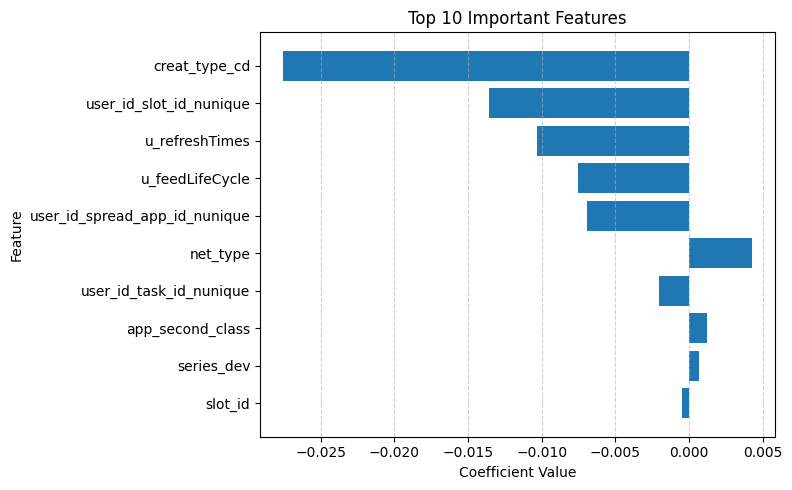

In [27]:
import matplotlib.pyplot as plt

top_n = 10 

features, coefficients = zip(*important_features)

sorted_indices = np.argsort(np.abs(coefficients))[::-1]
sorted_features = [features[i] for i in sorted_indices]
sorted_coefficients = [coefficients[i] for i in sorted_indices]

top_features = sorted_features[:top_n]
top_coefficients = sorted_coefficients[:top_n]

plt.figure(figsize=(8, 5))
plt.barh(top_features, top_coefficients, align='center')
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title(f"Top {top_n} Important Features")
plt.gca().invert_yaxis()  # Invert y-axis to have the highest coefficient on top
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [11]:
import numpy as np

feature_names = X_train.columns

# Non-zero coefficients
non_zero_indices = np.where(lasso.coef_ != 0)[0]
important_features = [(feature_names[i], lasso.coef_[i]) for i in non_zero_indices]

# Print non-zero coefficients
print("Important Features and their Coefficients:")
for feature, coef in important_features:
    print(f"Feature: {feature}, Coefficient: {coef}")

# Features with coefficients > 1e-6
threshold = 1e-6
filtered_features = [feature_names[i] for i in non_zero_indices if abs(lasso.coef_[i]) > threshold]

print("\nFeatures with coefficients > 1e-6:")
print(filtered_features)
print(len(filtered_features))

Important Features and their Coefficients:
Feature: log_id, Coefficient: -1.2325431936886553e-09
Feature: user_id, Coefficient: 1.4510114821132684e-08
Feature: city, Coefficient: 2.4689391063937872e-05
Feature: series_dev, Coefficient: 0.0006477151275460204
Feature: emui_dev, Coefficient: 8.797044509093144e-05
Feature: device_name, Coefficient: 2.6403807767637695e-05
Feature: device_size, Coefficient: -1.9381222275957886e-05
Feature: net_type, Coefficient: 0.004241606611311779
Feature: task_id, Coefficient: -2.4515994552600414e-07
Feature: adv_id, Coefficient: 8.079606137143922e-07
Feature: creat_type_cd, Coefficient: -0.027528974402925774
Feature: adv_prim_id, Coefficient: 1.4373040587943518e-07
Feature: slot_id, Coefficient: -0.0005029128437436971
Feature: spread_app_id, Coefficient: -8.699970860354822e-05
Feature: app_second_class, Coefficient: 0.0012130709714165203
Feature: pt_d, Coefficient: -8.59543907918367e-08
Feature: u_refreshTimes, Coefficient: -0.010326744098950263
Feature:

In [12]:
train_filtered_df = train_data[filtered_features + ['label']]
test_filtered_df = test_data[filtered_features + ['label']]
print(f"Filtered train dataset shape: {train_filtered_df.shape}")
print(f"Filtered test dataset shape: {test_filtered_df.shape}")

Filtered train dataset shape: (3813974, 23)
Filtered test dataset shape: (23784, 23)


In [14]:
train_filtered_df.to_csv("train_data_after_feature_selection.csv", index=False) # Specify where to save the train df
test_filtered_df.to_csv("test_data_after_feature_selection.csv", index=False) # Specify where to save the test df